# 911 Calls 

In [1]:
##For this project we will be analyzing some 911 call data from Kaggle. The data contains the following fields:

    #lat : String variable, Latitude
    #lng: String variable, Longitude
    #desc: String variable, Description of the Emergency Call
    #zip: String variable, Zipcode
    #title: String variable, Title
    #timeStamp: String variable, YYYY-MM-DD HH:MM:SS
    #twp: String variable, Township
    #addr: String variable, Address
    #e: String variable, Dummy variable (always 1)

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
import scipy

In [6]:
from plotly import __version__
import cufflinks as cf

In [7]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [8]:
init_notebook_mode(connected=True)
cf.go_offline()

In [9]:
df = pd.read_csv('911.csv')

In [10]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [11]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [13]:
df.isnull().sum()

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
dtype: int64

#### Top 5 zip codes for 911 calls

In [14]:
df['zip'].value_counts().head(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

#### Top 5 townships (twp) for 911 calls

In [15]:
df['twp'].value_counts().head()

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

### Creating a new feature

Creating a new column named 'Reasons' by separating the department and reasons from the title column

In [16]:
df['Reasons'] = df['title'].apply(lambda x: x.split(':')[0])

In [17]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


#### Most common reason for a 911 call

In [18]:
df['Reasons'].value_counts()

Reasons
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

- Creating a countplot of 911 calls by Reason

D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



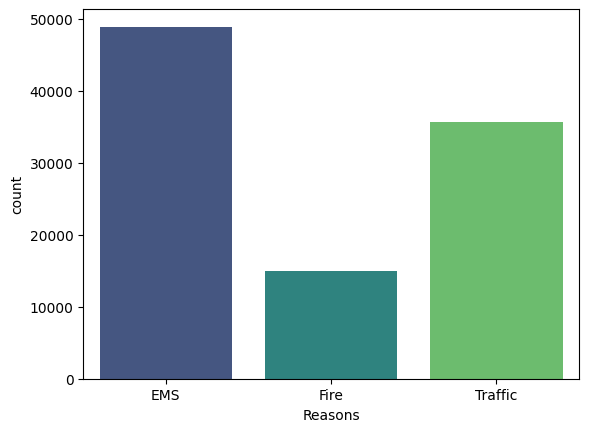

In [19]:
sns.countplot(x='Reasons', data=df, palette='viridis')
plt.savefig('img/countplot.png')

#### Converting strings to DateTime Object in the timeStamp column

In [20]:
type(df['timeStamp'].iloc[0])

str

In [21]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [22]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [23]:
df['Hour'] = df['timeStamp'].apply(lambda time : time.hour)
df['Month'] = df['timeStamp'].apply(lambda time : time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time : time.dayofweek)

In [24]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [25]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [26]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [27]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


In [28]:
# Countplot of the Day Of Week column with hue based off of the Reason column

D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



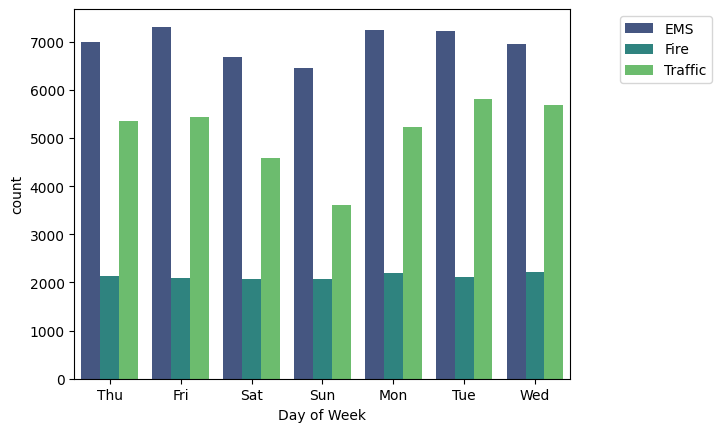

In [29]:
sns.countplot(x='Day of Week', data=df, hue='Reasons', palette='viridis')

plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right')
plt.savefig('img/dayOfWeek.png')

In [30]:
# Countplot of Month with hue basec off of Reason

D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



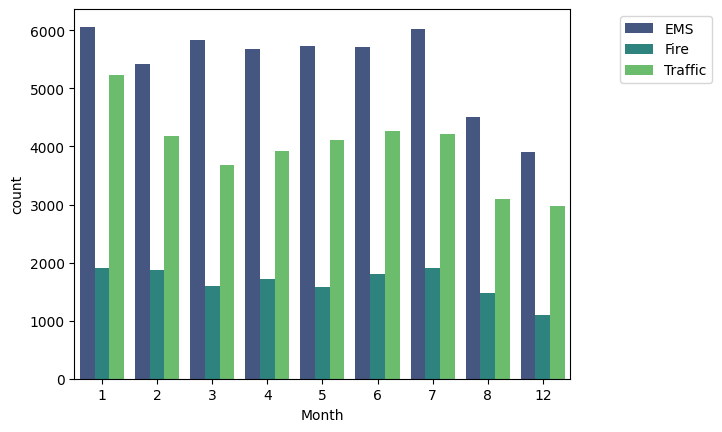

In [31]:
sns.countplot(x='Month', data=df, hue='Reasons', palette='viridis')

plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right')
plt.savefig('img/month.png')

In [32]:
#Filling up the missing months

In [33]:
byMonth = df.groupby('Month').count()

In [34]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


In [35]:
# Count of calls per month

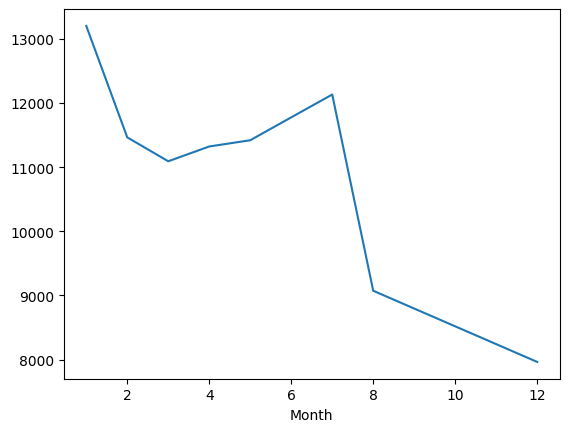

In [36]:
byMonth['twp'].plot()
plt.savefig('img/line.png')

In [37]:
# Checking the linear fit on the number of calls per month

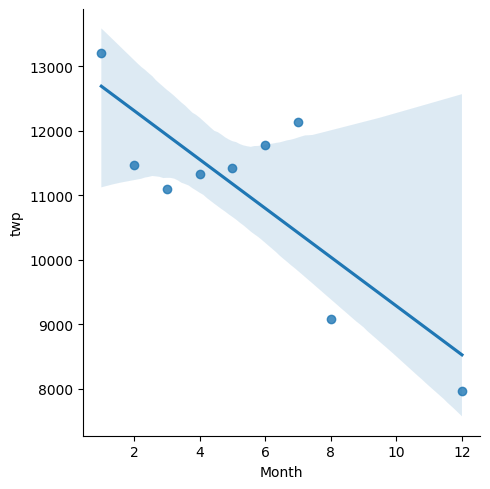

In [38]:
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())
plt.savefig('img/lmplot.png')

In [39]:
# Creating a new column 'Date' that contains the date from the timeStamp column.

In [40]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())

In [41]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


In [42]:
df.groupby('Date').count()['twp']

Date
2015-12-10    115
2015-12-11    395
2015-12-12    403
2015-12-13    319
2015-12-14    446
             ... 
2016-08-20    328
2016-08-21    357
2016-08-22    388
2016-08-23    439
2016-08-24    132
Name: twp, Length: 259, dtype: int64

In [43]:
# Analysing the number of 911 calls

In [ ]:
plt.figure(figsize=(12, 6))
ax = df.groupby('Date').count()['twp'].iplot()

plt.tight_layout()

In [ ]:
reasons = ['Traffic', 'Fire', 'EMS']

In [ ]:
for reason in reasons:
    df[df['Reasons'] == reason].groupby('Date').count()['twp'].iplot(
        layout = {
            "scene": {
                'xaxis': {'title': 'Months of the year'},
                'yaxis': {'title': 'Number of calls'}
            }
        }
    )

In [ ]:
plt.figure(figsize=(12, 6))
df[df['Reasons']=='Traffic'].groupby('Date').count()['twp'].plot()
df[df['Reasons']=='Fire'].groupby('Date').count()['twp'].plot()
df[df['Reasons']=='EMS'].groupby('Date').count()['twp'].plot()
plt.legend(['Traffic', 'Fire', 'EMS'])
plt.tight_layout()
plt.savefig('img/reasons.png')

In [ ]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['Reasons'].unstack()

In [ ]:
dayHour

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')
plt.savefig('img/heatmap_1.png')

In [ ]:
sns.clustermap(dayHour, cmap='viridis')
plt.savefig('img/clustermap_1.png')

In [ ]:
byMonth = df.groupby(by=['Day of Week', 'Month']).count()['Reasons'].unstack()

In [ ]:
byMonth

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(byMonth,cmap='viridis')
plt.savefig('img/heatmap_2.png')

In [ ]:
sns.clustermap(byMonth,cmap='viridis')
plt.savefig('img/clustermap_2.png')